In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('data.csv')

C:\Users\Shruti Nathavani\AppData\Local\Temp\ipykernel_3012\546086871.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,13,14,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,163,164,166,169,171,172,173,174,175,176,177,178,184,185,187,190,192,193,194,195,196,197,198,199,205,206,208,211,213,214,215,216,217,218,219,220,223,225,226,227,229,232,234,235,236,237,238,239,240,244,246,247,248,250,253,254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('data.csv')


In [3]:
dataset.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-16,30-04-19,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-17,13-05-19,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-17,30-04-19,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-17,20-08-19,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-18,15-04-19,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(1048547, 260)

In [5]:
dataset.drop(dataset[dataset['VISA_CLASS'] == 'E-3 Australian'].index, inplace = True)
dataset.drop(dataset[dataset['VISA_CLASS'] == 'H-1B1 Singapore'].index, inplace = True)
dataset.drop(dataset[dataset['VISA_CLASS'] == 'H-1B1 Chile'].index, inplace = True)
dataset.drop(dataset[dataset['VISA_CLASS'] == 'nan'].index, inplace = True)

In [6]:
dataset.shape

(1033014, 260)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033014 entries, 0 to 1048546
Columns: 260 entries, CASE_NUMBER to PUBLIC_DISCLOSURE
dtypes: float64(82), object(178)
memory usage: 2.0+ GB


In [8]:
dataset.describe

<bound method NDFrame.describe of                 CASE_NUMBER CASE_STATUS       CASE_SUBMITTED DECISION_DATE  \
0        I-200-16092-327771   WITHDRAWN             08-04-16      30-04-19   
5        I-200-18150-993604   WITHDRAWN             30-05-18      08-08-19   
6        I-200-18289-307616   WITHDRAWN  10-19-2018 13:49:03      19-10-18   
7        I-200-19015-877040   WITHDRAWN       15-01-19 15:12      15-01-19   
8        I-200-19031-693896   WITHDRAWN       31-01-19 16:32      31-01-19   
...                     ...         ...                  ...           ...   
1048542                 NaN         NaN                  NaN           NaN   
1048543                 NaN         NaN                  NaN           NaN   
1048544                 NaN         NaN                  NaN           NaN   
1048545                 NaN         NaN                  NaN           NaN   
1048546                 NaN         NaN                  NaN           NaN   

        ORIGINAL_CERT_DATE VI

In [9]:
dataset['VISA_CLASS'].unique()

array(['H-1B', nan], dtype=object)

In [10]:
dataset.dtypes

CASE_NUMBER           object
CASE_STATUS           object
CASE_SUBMITTED        object
DECISION_DATE         object
ORIGINAL_CERT_DATE    object
                       ...  
WILLFUL_VIOLATOR      object
SUPPORT_H1B           object
STATUTORY_BASIS       object
MASTERS_EXEMPTION     object
PUBLIC_DISCLOSURE     object
Length: 260, dtype: object

In [11]:
dataset['CASE_STATUS'].unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', nan],
      dtype=object)

In [12]:
# dropping case status which aren't neede
dataset.drop(dataset[dataset['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN'].index, inplace = True)
dataset.drop(dataset[dataset['CASE_STATUS'] == 'WITHDRAWN'].index, inplace = True)
dataset.drop(dataset[dataset['CASE_STATUS'] == 'Nan'].index, inplace = True)

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

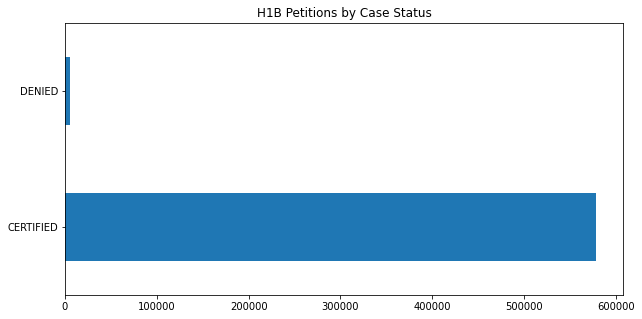

In [13]:
%matplotlib inline
#import ggplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
dataset['CASE_STATUS'].value_counts().plot(kind='barh',title='H1B Petitions by Case Status')

<AxesSubplot:ylabel='CASE_STATUS'>

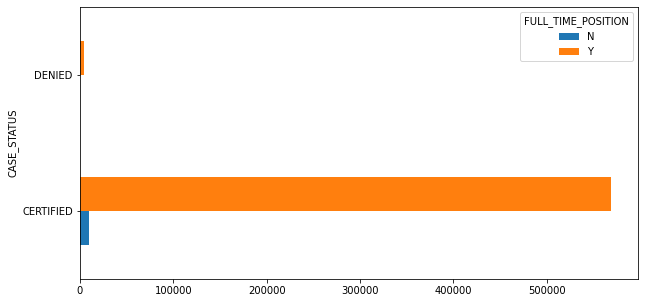

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
pd.crosstab(dataset['CASE_STATUS'],dataset['FULL_TIME_POSITION']).plot(kind='barh')

<AxesSubplot:title={'center':'Job title of top 20 h1b companies'}, ylabel='JOB_TITLE'>

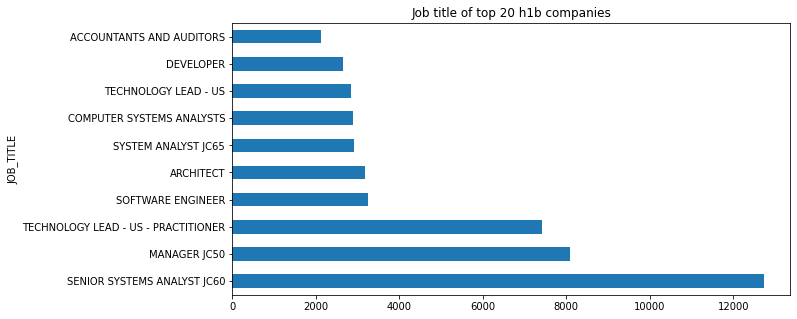

In [15]:
plt.rcParams["figure.figsize"] = (10,5)
top_10=dataset.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(10).index.tolist()
top_10_datset=dataset.loc[dataset.EMPLOYER_NAME.isin(top_10)]
top_10_datset.groupby('JOB_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Job title of top 20 h1b companies')

In [16]:

order_by_job_title = dataset.groupby('JOB_TITLE').count().sort_values(by='CASE_STATUS', ascending=False).index[0:10]
order_by_job_title

Index(['SOFTWARE DEVELOPER', 'SOFTWARE ENGINEER',
       'SENIOR SYSTEMS ANALYST JC60', 'MANAGER JC50',
       'SENIOR SOFTWARE ENGINEER', 'TECHNOLOGY LEAD - US - PRACTITIONER',
       'ASSISTANT PROFESSOR', 'PROGRAMMER ANALYST',
       'SENIOR SOFTWARE DEVELOPER', 'JAVA DEVELOPER'],
      dtype='object', name='JOB_TITLE')

<AxesSubplot:xlabel='JOB_TITLE', ylabel='count'>

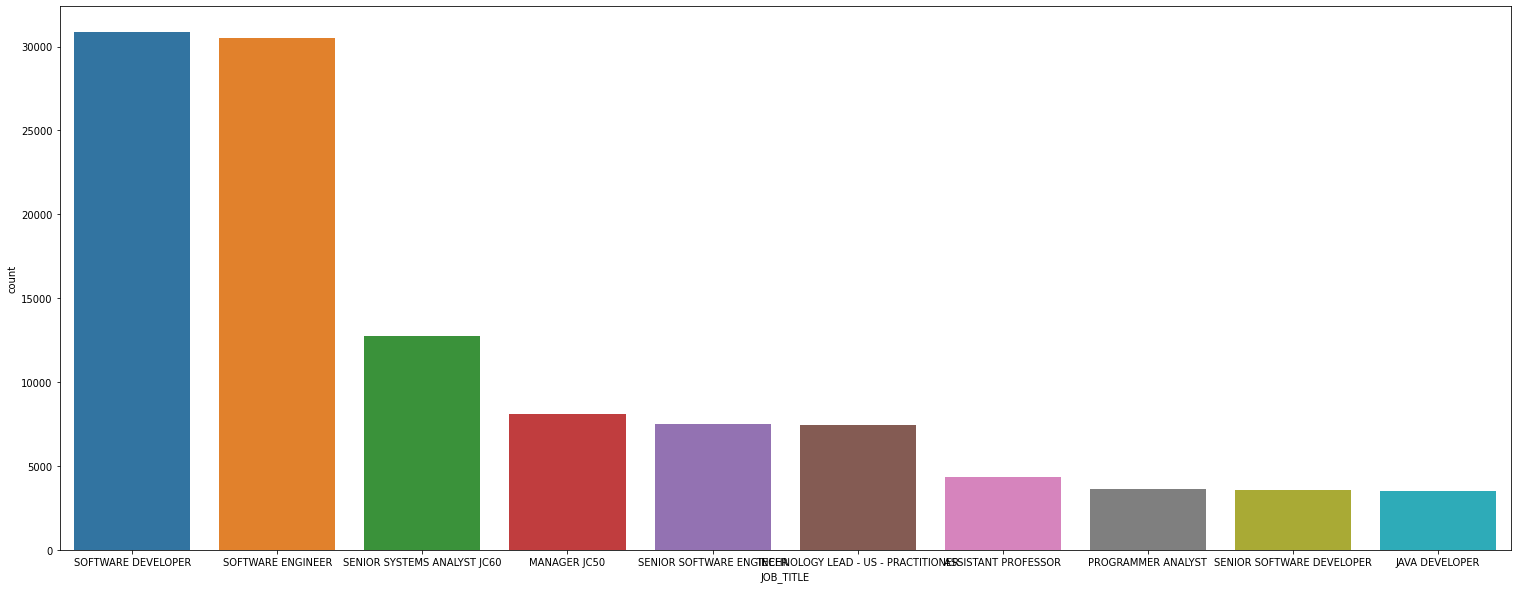

In [17]:
plt.figure(figsize=(26,10))
sns.countplot(x='JOB_TITLE', data=dataset, order=order_by_job_title)

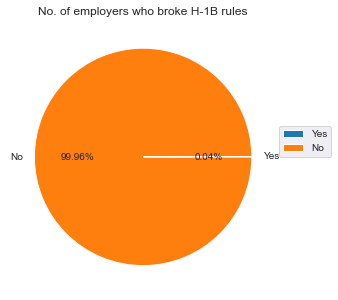

In [18]:
sns.set_style('darkgrid')
Yes = dataset.WILLFUL_VIOLATOR[dataset.WILLFUL_VIOLATOR == 'Y'].count()
No = dataset.WILLFUL_VIOLATOR[dataset.WILLFUL_VIOLATOR == 'N'].count()

plt.title("No. of employers who broke H-1B rules")
plt.pie([Yes, No], labels=['Yes', 'No'], autopct="%.2f%%")
plt.legend(loc=(1,0.5))

plt.show()

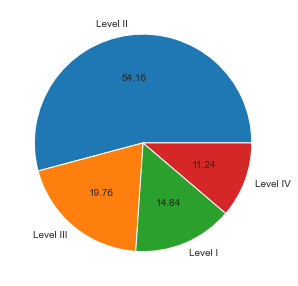

In [19]:
wage_level = dataset['PW_WAGE_LEVEL_1'].value_counts()
plt.pie(wage_level,autopct='%.2f',labels=['Level II','Level III','Level I','Level IV'])
plt.show()

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

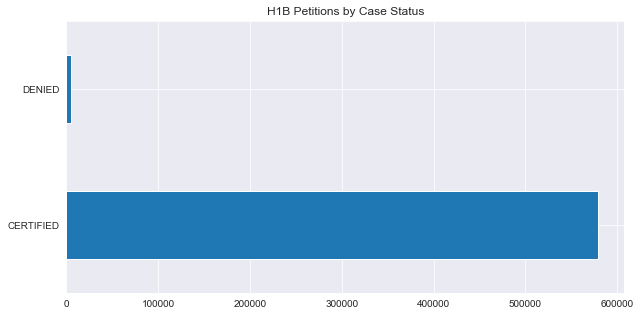

In [20]:
%matplotlib inline
#import ggplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
dataset['CASE_STATUS'].value_counts().plot(kind='barh',title='H1B Petitions by Case Status')

d:\Program File\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL_WORKER_POSITIONS', ylabel='NEW_CONCURRENT_EMPLOYMENT'>

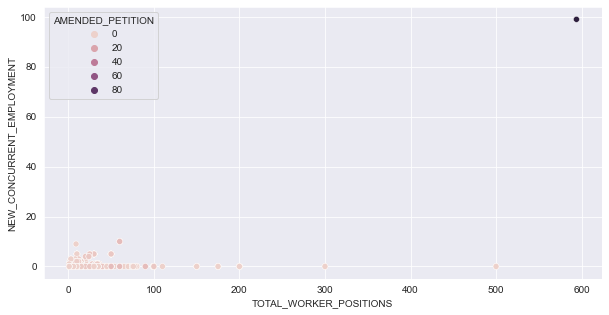

In [21]:
sns.scatterplot(dataset['TOTAL_WORKER_POSITIONS'],dataset['NEW_CONCURRENT_EMPLOYMENT'],dataset['AMENDED_PETITION'])

In [22]:
dataset.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
24,I-200-18162-689783,CERTIFIED,26-09-18,02-10-18,NaN,H-1B,ADVERSTING AND PROMOTIONS MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,N,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
26,I-200-18268-784387,CERTIFIED,27-09-18,03-10-18,NaN,H-1B,ADVERTISING AND PROMOTIONS DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
47,I-200-18299-123963,CERTIFIED,10-26-2018 17:31:16,11-01-2018 22:00:49,NaN,H-1B,PROGRAM MANAGER I,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
52,I-200-18310-551334,CERTIFIED,11-06-2018 12:37:33,11-13-2018 22:00:38,NaN,H-1B,ASSOCIATE STRATEGY DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
54,I-200-18317-440186,CERTIFIED,11-13-2018 20:06:33,11-19-2018 22:00:55,NaN,H-1B,ADVERTISING AND PROMOTIONS MANAGER,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS


In [23]:
dataset.shape

(967737, 260)

In [24]:
dataset.shape

(967737, 260)

In [25]:
dataset.describe()

,TOTAL_WORKER_POSITIONS,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,NAICS_CODE,WORKSITE_WORKERS_1,PREVAILING_WAGE_1,PW_OES_YEAR_1,PW_NON-OES_YEAR_1,...,PW_NON-OES_YEAR_9,PW_SURVEY_PUBLISHER_9,WORKSITE_WORKERS_10,WORKSITE_POSTAL_CODE_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_RATE_OF_PAY_TO_10,PREVAILING_WAGE_10,PW_OES_YEAR_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10
count,583805.000000,583806.000000,583805.000000,583806.000000,583806.000000,583805.000000,534016.000000,579125.000000,67730.000000,5.097420e+05,...,277.000000,57.000000,238.000000,238.000000,238.000000,85.000000,238.000000,48.000000,187.000000,48.000000
mean,1.671714,0.124814,0.014568,0.273586,0.237969,450683.011088,5.085670,84334.469125,2020.812255,2.036252e+03,...,2018.422383,2017.877193,2.554622,43783.567227,137885.080042,161120.681294,99383.167017,2017.979167,2018.427807,2017.979167
std,4.677798,0.951355,0.300402,1.169960,0.939516,189651.800010,496.535692,35379.050487,421.641867,1.222907e+04,...,0.550300,0.708877,5.226834,29096.518321,102360.602875,112832.514403,61366.388324,0.325484,0.547602,0.325484
min,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,7.250000,1.000000,1.000000e+00,...,2018.000000,2013.000000,1.000000,2115.000000,24.550000,31.480000,24.550000,2017.000000,2018.000000,2017.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,454111.000000,1.000000,69285.000000,2018.000000,2.018000e+03,...,2018.000000,2018.000000,1.000000,18510.000000,58369.250000,70082.000000,58067.190000,2018.000000,2018.000000,2018.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,541511.000000,1.000000,84240.000000,2018.000000,2.018000e+03,...,2018.000000,2018.000000,1.000000,40712.500000,97084.000000,140000.000000,75025.500000,2018.000000,2018.000000,2018.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,541512.000000,1.000000,102398.000000,2018.000000,2.019000e+03,...,2019.000000,2018.000000,1.000000,71748.000000,210000.000000,218160.000000,141263.000000,2018.000000,2019.000000,2018.000000
max,594.000000,338.000000,99.000000,99.000000,99.000000,928120.000000,160500.000000,849680.000000,72000.000000,8.731800e+06,...,2020.000000,2019.000000,45.000000,99218.000000,525000.000000,500000.000000,282235.000000,2019.000000,2020.000000,2019.000000


In [26]:
dataset['VISA_CLASS'].unique()

array(['H-1B', nan], dtype=object)

In [27]:
dataset.dtypes

CASE_NUMBER           object
CASE_STATUS           object
CASE_SUBMITTED        object
DECISION_DATE         object
ORIGINAL_CERT_DATE    object
                       ...  
WILLFUL_VIOLATOR      object
SUPPORT_H1B           object
STATUTORY_BASIS       object
MASTERS_EXEMPTION     object
PUBLIC_DISCLOSURE     object
Length: 260, dtype: object

In [28]:
dataset['CASE_STATUS'].unique()

array(['CERTIFIED', 'DENIED', nan], dtype=object)

In [29]:
dataset.shape

(967737, 260)

In [30]:
dataset['EMPLOYER_COUNTRY'].unique()

array(['UNITED STATES OF AMERICA', 'CANADA', 'TURKEY', 'INDIA',
       'GUATEMALA', 'AFGHANISTAN', 'ALBANIA', 'AUSTRALIA', nan],
      dtype=object)

In [31]:
dataset['EMPLOYER_COUNTRY'].value_counts()

UNITED STATES OF AMERICA    583774
CANADA                          23
INDIA                            3
GUATEMALA                        2
TURKEY                           1
AFGHANISTAN                      1
ALBANIA                          1
AUSTRALIA                        1
Name: EMPLOYER_COUNTRY, dtype: int64

In [32]:
dataset['EMPLOYER_COUNTRY'].unique()

array(['UNITED STATES OF AMERICA', 'CANADA', 'TURKEY', 'INDIA',
       'GUATEMALA', 'AFGHANISTAN', 'ALBANIA', 'AUSTRALIA', nan],
      dtype=object)

In [33]:
dataset['EMPLOYER_NAME'].unique()

array(['FANTUAN GROUP INC', 'TPUSA-FHCS', 'UNIVERSITY OF TEXAS AT DALLAS',
       ..., 'EVEREST CONSULTANTS, INC.',
       'EMBRAER EXECUTIVE AIRCRAFT, INC.',
       'PORT LOGISTICS TERMINAL OPERATIONS, LLC'], dtype=object)

In [34]:
dataset['AGENT_REPRESENTING_EMPLOYER'].unique()

array(['Y', 'N', nan], dtype=object)

In [35]:
dataset['JOB_TITLE'].unique()

array(['ADVERSTING AND PROMOTIONS MANAGER',
       'ADVERTISING AND PROMOTIONS DIRECTOR', 'PROGRAM MANAGER I', ...,
       'CONTAINER MOBILE HARBOR CRANE OPERATOR',
       'DIGITAL TOUCHPOINTS ANALYST', nan], dtype=object)

In [36]:
dataset['SOC_CODE'].unique()

array(['11-2011', '11-2021', '11-2022', '11-2031', '15-1132', '15-1133',
       '17-2112', '27-1021', '29-1122', '11-3011', '11-3021', '11-3031',
       '11-3051', '11-3061', '11-3071', '11-3111', '11-3121', '11-3131',
       '11-9013', '11-9021', '11-9031', '11-9032', '11-9033', '11-9039',
       '11-9041', '11-9051', '11-9081', '11-9111', '11-9121', '11-9141',
       '11-9151', '11-9161', '11-9199', '11-1011', '11-1021',
       '11-3031.02', '11-3051.01', '11-3071.03', '11-9199.02',
       '11-9199.07', '13-1011', '13-1021', '13-1022', '13-1023',
       '13-1031', '13-1041', '13-1041.07', '13-1051', '13-1071',
       '13-1075', '13-1081', '13-1081.00', '13-1111', '13-1111.00',
       '13-1121', '13-1131', '13-1141', '13-1151', '13-1161',
       '13-1161.00', '13-1199', '13-2011', '13-2021', '13-2031',
       '13-2041', '13-2051', '13-2052', '13-2053', '13-2061', '13-2071',
       '13-2072', '13-2081', '13-2082', '13-2099', '13-2099.01',
       '13-2099.02', '15-1021.00', '15-1022', '

In [37]:
dataset.shape

(967737, 260)

In [38]:
dataset.CASE_STATUS.replace(['CERTIFIED','DENIED'],[1,0],inplace=True)

In [39]:
#creating new dataset with selected features
dt2 = dataset[['CASE_STATUS','AGENT_REPRESENTING_EMPLOYER', 'VISA_CLASS', 'JOB_TITLE', 'FULL_TIME_POSITION', 'H-1B_DEPENDENT', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'WILLFUL_VIOLATOR', 'WAGE_RATE_OF_PAY_FROM_1','WAGE_RATE_OF_PAY_TO_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']]

In [40]:
dt2.head(2)

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,1.0,Y,H-1B,ADVERSTING AND PROMOTIONS MANAGER,N,N,FANTUAN GROUP INC,NaN,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,...,0.0,0.0,0.0,0.0,N,$33.00,NaN,Hour,1.0,NaN
26,1.0,Y,H-1B,ADVERTISING AND PROMOTIONS DIRECTOR,Y,N,TPUSA-FHCS,NaN,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,...,0.0,0.0,1.0,0.0,N,"$99,000.00",NaN,Year,1.0,NaN


In [41]:
dt2.shape

(967737, 23)

In [42]:
dt2.corr()

,CASE_STATUS,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
CASE_STATUS,1.000000,0.019261,-0.009367,-0.003029,0.002131,0.002615,-0.004452,0.028283
NAICS_CODE,0.019261,1.000000,-0.031080,-0.039860,-0.099776,-0.120573,-0.107953,-0.033852
CHANGE_PREVIOUS_EMPLOYMENT,-0.009367,-0.031080,1.000000,0.302500,0.412826,0.519096,0.503080,0.036317
NEW_CONCURRENT_EMPLOYMENT,-0.003029,-0.039860,0.302500,1.000000,0.236780,0.296902,0.376653,-0.048329
CHANGE_EMPLOYER,0.002131,-0.099776,0.412826,0.236780,1.000000,0.524290,0.571664,0.096693
AMENDED_PETITION,0.002615,-0.120573,0.519096,0.296902,0.524290,1.000000,0.599843,0.048931
TOTAL_WORKER_POSITIONS,-0.004452,-0.107953,0.503080,0.376653,0.571664,0.599843,1.000000,0.043736
PREVAILING_WAGE_1,0.028283,-0.033852,0.036317,-0.048329,0.096693,0.048931,0.043736,1.000000


In [43]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967737 entries, 24 to 1048546
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583806 non-null  float64
 1   AGENT_REPRESENTING_EMPLOYER  583801 non-null  object 
 2   VISA_CLASS                   583806 non-null  object 
 3   JOB_TITLE                    583806 non-null  object 
 4   FULL_TIME_POSITION           583806 non-null  object 
 5   H-1B_DEPENDENT               583786 non-null  object 
 6   EMPLOYER_NAME                583802 non-null  object 
 7   SECONDARY_ENTITY_1           534045 non-null  object 
 8   SOC_TITLE                    583802 non-null  object 
 9   SOC_CODE                     583802 non-null  object 
 10  NAICS_CODE                   583805 non-null  float64
 11  NEW_EMPLOYMENT               583806 non-null  object 
 12  CONTINUED_EMPLOYMENT         583806 non-null  object 
 1

In [44]:
#creating copy of newly formed dataset
dt=dt2.copy(deep=True)

In [45]:
#categorical columns
categorical_columns = dt.select_dtypes(exclude='number').columns.to_list()
categorical_columns

['AGENT_REPRESENTING_EMPLOYER',
 'VISA_CLASS',
 'JOB_TITLE',
 'FULL_TIME_POSITION',
 'H-1B_DEPENDENT',
 'EMPLOYER_NAME',
 'SECONDARY_ENTITY_1',
 'SOC_TITLE',
 'SOC_CODE',
 'NEW_EMPLOYMENT',
 'CONTINUED_EMPLOYMENT',
 'WILLFUL_VIOLATOR',
 'WAGE_RATE_OF_PAY_FROM_1',
 'WAGE_RATE_OF_PAY_TO_1',
 'WAGE_UNIT_OF_PAY_1']

In [46]:
#numerical columns
numerical_columns = dt.select_dtypes(include='number').columns.to_list()
numerical_columns

['CASE_STATUS',
 'NAICS_CODE',
 'CHANGE_PREVIOUS_EMPLOYMENT',
 'NEW_CONCURRENT_EMPLOYMENT',
 'CHANGE_EMPLOYER',
 'AMENDED_PETITION',
 'TOTAL_WORKER_POSITIONS',
 'PREVAILING_WAGE_1']

In [47]:
dt.describe()

,CASE_STATUS,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
count,583806.000000,583805.000000,583806.000000,583805.000000,583806.000000,583806.000000,583805.000000,579125.000000
mean,0.991151,450683.011088,0.124814,0.014568,0.273586,0.237969,1.671714,84334.469125
std,0.093651,189651.800010,0.951355,0.300402,1.169960,0.939516,4.677798,35379.050487
min,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.250000
25%,1.000000,454111.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69285.000000
50%,1.000000,541511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,84240.000000
75%,1.000000,541512.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102398.000000
max,1.000000,928120.000000,338.000000,99.000000,99.000000,99.000000,594.000000,849680.000000


In [48]:
dt.isnull().sum()

CASE_STATUS                    383931
AGENT_REPRESENTING_EMPLOYER    383936
VISA_CLASS                     383931
JOB_TITLE                      383931
FULL_TIME_POSITION             383931
H-1B_DEPENDENT                 383951
EMPLOYER_NAME                  383935
SECONDARY_ENTITY_1             433692
SOC_TITLE                      383935
SOC_CODE                       383935
NAICS_CODE                     383932
NEW_EMPLOYMENT                 383931
CONTINUED_EMPLOYMENT           383931
CHANGE_PREVIOUS_EMPLOYMENT     383931
NEW_CONCURRENT_EMPLOYMENT      383932
CHANGE_EMPLOYER                383931
AMENDED_PETITION               383931
WILLFUL_VIOLATOR               383951
WAGE_RATE_OF_PAY_FROM_1        383935
WAGE_RATE_OF_PAY_TO_1          669324
WAGE_UNIT_OF_PAY_1             383935
TOTAL_WORKER_POSITIONS         383932
PREVAILING_WAGE_1              388612
dtype: int64

<AxesSubplot:>

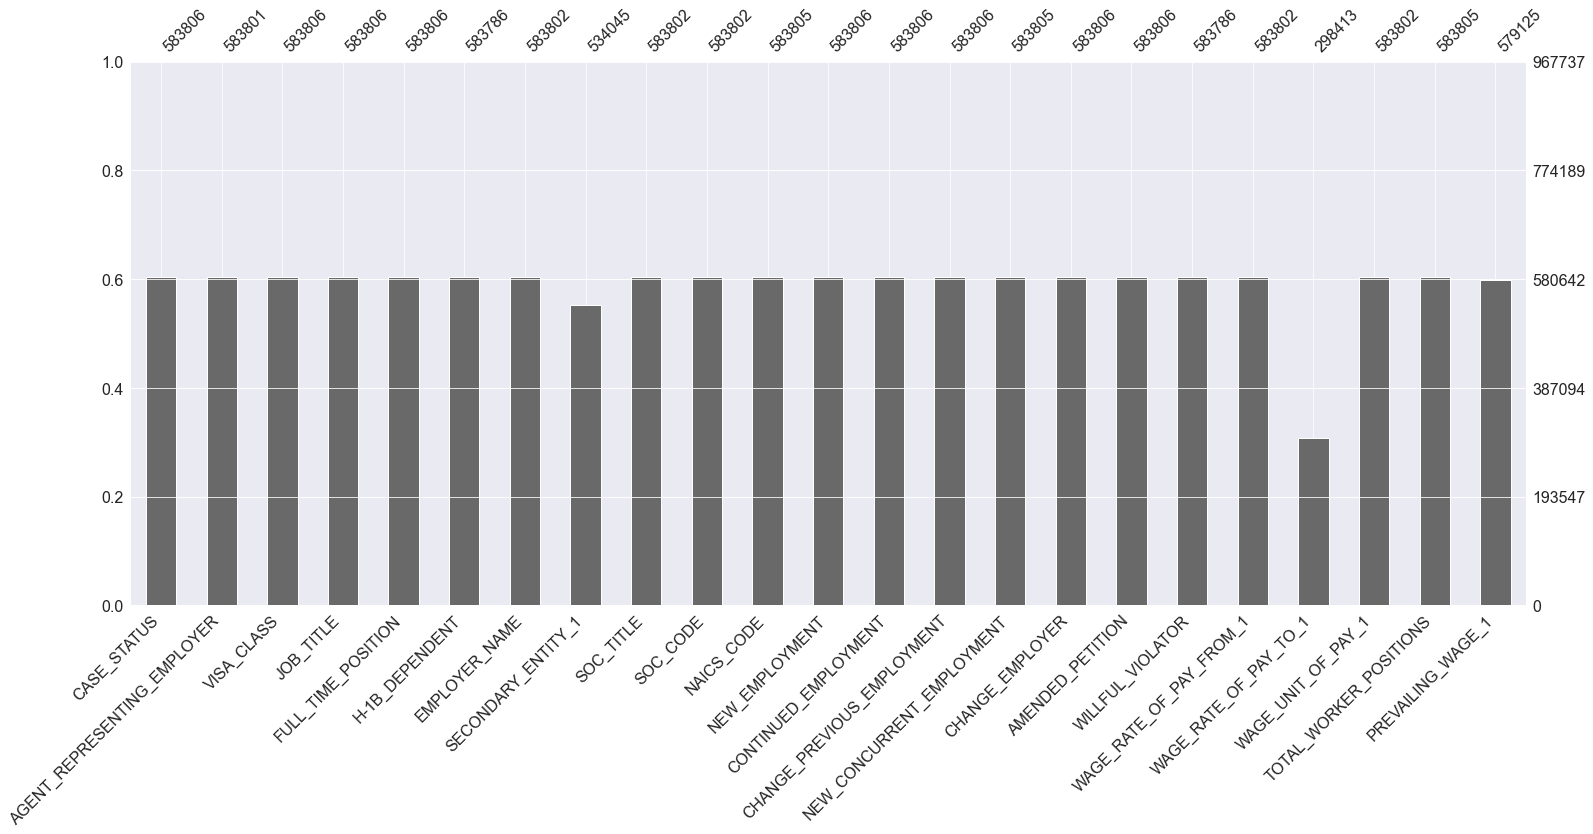

In [49]:
# Let's check if there is any trend in missing data
mno.bar(dt)

In [50]:
#dropping the enteries with missing values
dt.dropna(inplace=True)

In [51]:
dt.shape

(287371, 23)

In [52]:
dt.isnull().sum()

CASE_STATUS                    0
AGENT_REPRESENTING_EMPLOYER    0
VISA_CLASS                     0
JOB_TITLE                      0
FULL_TIME_POSITION             0
H-1B_DEPENDENT                 0
EMPLOYER_NAME                  0
SECONDARY_ENTITY_1             0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_RATE_OF_PAY_TO_1          0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

In [53]:
dt.dtypes

CASE_STATUS                    float64
AGENT_REPRESENTING_EMPLOYER     object
VISA_CLASS                      object
JOB_TITLE                       object
FULL_TIME_POSITION              object
H-1B_DEPENDENT                  object
EMPLOYER_NAME                   object
SECONDARY_ENTITY_1              object
SOC_TITLE                       object
SOC_CODE                        object
NAICS_CODE                     float64
NEW_EMPLOYMENT                  object
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT     float64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                float64
AMENDED_PETITION               float64
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1         object
WAGE_RATE_OF_PAY_TO_1           object
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
dtype: object

## Performing binary encoding 
AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,H-1B_DEPENDENT,SECONDARY_ENTITY_1,WILLFUL_VIOLATOR

In [54]:
# #AGENT_REPRESENTING_EMPLOYER
be=BinaryEncoder()
be_enc=be.fit_transform(dt['AGENT_REPRESENTING_EMPLOYER'])
dt=pd.concat([dt,be_enc],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,CHANGE_EMPLOYER,AMENDED_PETITION,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1
23382,1.0,Y,H-1B,CAPACITY PLANNING MANAGER,Y,N,"CLOUDFLARE, INC.",N,"MANAGERS, ALL OTHER",11-9199,...,1.0,0.0,N,135000,155000,Year,1.0,132184.0,0,1
328866,1.0,Y,H-1B,SOFTWARE DEVELOPER,Y,Y,UNITED IT SOLUTIONS INC,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0.0,0.0,N,88483.0,90000.0,Year,1.0,88483.0,0,1
99155,1.0,N,H-1B,TECHNOLOGY LEAD - US - PRACTITIONER,Y,Y,INFOSYS LIMITED,Y,COMPUTER SYSTEMS ANALYST,15-1121,...,0.0,0.0,N,78187.0,78187.0,Year,1.0,78187.0,1,0
245479,1.0,Y,H-1B,SOFTWARE DEVELOPER,Y,N,"WORLDCARE CLINICAL, LLC",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0.0,0.0,N,84698.0,84698.0,Year,1.0,84698.0,0,1
233691,1.0,Y,H-1B,STAFF ENGINEER,Y,N,"VMWARE, INC.",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,0.0,0.0,N,182000.0,182000.0,Year,1.0,155106.0,0,1


In [55]:
# #FULL_TIME_POSITION
be1=BinaryEncoder()
be_enc1=be1.fit_transform(dt['FULL_TIME_POSITION'])
dt=pd.concat([dt,be_enc1],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1
384380,1.0,Y,H-1B,SOFTWARE ENGINEER,Y,N,NET ESOLUTIONS CORPORATION,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,N,125091.0,125091.0,Year,1.0,117458.0,0,1,0,1
165863,1.0,Y,H-1B,PROGRAMMER ANALYST - II,Y,Y,"HCL AMERICA, INC.",Y,COMPUTER PROGRAMMERS,15-1131,...,N,77073.0,77073.0,Year,1.0,71573.0,0,1,0,1
428767,1.0,Y,H-1B,DEVELOPER USER INTERFACE,Y,Y,TATA CONSULTANCY SERVICES LIMITED,Y,WEB DEVELOPERS,15-1134,...,N,65333,97000,Year,1.0,65333.0,0,1,0,1
506382,1.0,Y,H-1B,TEST LEAD,Y,Y,MINDTREE LIMITED,Y,"COMPUTER OCCUPATIONS, ALL OTHER",15-1199,...,N,80462.0,80462.0,Year,1.0,73798.0,0,1,0,1
244992,1.0,Y,H-1B,SOLUTIONS ARCHITECT,Y,Y,LARSEN & TOUBRO INFOTECH LIMITED,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,N,96366.0,150000.0,Year,1.0,96366.0,0,1,0,1


In [56]:
# #H-1B_DEPENDENT
be2=BinaryEncoder()
be_enc2=be2.fit_transform(dt['H-1B_DEPENDENT'])
dt=pd.concat([dt,be_enc2],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0,H-1B_DEPENDENT_1
403970,1.0,Y,H-1B,"SOLUTIONS ARCHITECT, SYSTEMS",Y,N,"GENENTECH, INC.",N,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",15-1133,...,177500.0,Year,1.0,130736.0,0,1,0,1,0,1
167428,1.0,N,H-1B,PROGRAMMER ANALYST,Y,Y,WIPRO LIMITED,Y,COMPUTER PROGRAMMERS,15-1131,...,60736.0,Year,5.0,60736.0,1,0,0,1,1,0
65719,1.0,Y,H-1B,FINANCIAL ANALYST (11102.252),Y,N,"ESSILOR OF AMERICA, INC.",N,FINANCIAL ANALYSTS,13-2051,...,124510.0,Year,1.0,75712.0,0,1,0,1,0,1
574159,1.0,Y,H-1B,HARDWARE ENGINEER II,Y,Y,"DIDI RESEARCH AMERICA, LLC",N,MECHANICAL ENGINEERS,17-2141,...,155000.0,Year,1.0,108368.0,0,1,0,1,1,0
584752,1.0,Y,H-1B,QUALITY AUTOMATION LEAD,Y,N,"ELO TOUCH SOLUTIONS, INC.",N,"ENGINEERS, ALL OTHER",17-2199,...,120000.0,Year,1.0,100755.0,0,1,0,1,0,1


In [57]:
# #SECONDARY_ENTITY_1
be3=BinaryEncoder()
be_enc3=be3.fit_transform(dt['SECONDARY_ENTITY_1'])
dt=pd.concat([dt,be_enc3],axis=1)
dt.sample(frac=1).head()


,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_0,SECONDARY_ENTITY_1_1
332854,1.0,Y,H-1B,SOFTWARE ENGINEER,Y,Y,"CAPSQUARE SYSTEMS, INC.",Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,1.0,87464.0,0,1,0,1,1,0,1,0
407279,1.0,Y,H-1B,"SR. SOFTWARE ENGINEER, PAYMENTS",Y,N,"MARQETA, INC.",N,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",15-1133,...,1.0,126090.0,0,1,0,1,0,1,0,1
294891,1.0,Y,H-1B,PROGRAMMER ANALYST,Y,Y,"COMPU TECH COMPUTERS, INC.",N,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,1.0,96366.0,0,1,0,1,1,0,0,1
242601,1.0,Y,H-1B,FULL STACK JAVA DEVELOPER,Y,Y,"PROGRAMMER RESOURCES INTERNATIONAL, INC.",Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,1.0,115856.0,0,1,0,1,1,0,1,0
351742,1.0,N,H-1B,SENIOR SOFTWARE DEVELOPER,Y,Y,"MASTECH DIGITAL TECHNOLOGIES, INC., A MASTECH ...",Y,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,...,6.0,60.7,1,0,0,1,1,0,1,0


In [58]:
# #WILLFUL_VIOLATOR
be4=BinaryEncoder()
be_enc4=be4.fit_transform(dt['WILLFUL_VIOLATOR'])
dt=pd.concat([dt,be_enc4],axis=1)
dt.sample(frac=1).head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,VISA_CLASS,JOB_TITLE,FULL_TIME_POSITION,H-1B_DEPENDENT,EMPLOYER_NAME,SECONDARY_ENTITY_1,SOC_TITLE,SOC_CODE,...,AGENT_REPRESENTING_EMPLOYER_0,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_0,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_0,WILLFUL_VIOLATOR_1
444908,1.0,Y,H-1B,NETWORK ADMINISTRATOR - IV,Y,Y,"HCL AMERICA, INC.",Y,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,...,0,1,0,1,1,0,1,0,0,1
168682,1.0,N,H-1B,COMPUTER PROGRAMMER / CONFIGURER 3,Y,N,ACCENTURE LLP,N,COMPUTER PROGRAMMERS,15-1131,...,1,0,0,1,0,1,0,1,0,1
23394,1.0,N,H-1B,QUALITY ASSURANCE SPECIALIST II,Y,Y,THE VERITAS HEALTHCARE SOLUTIONS LLC,Y,"MANAGERS, ALL OTHER",11-9199,...,1,0,0,1,1,0,1,0,0,1
158506,1.0,Y,H-1B,NETWORK SECURITY ENGINEER,Y,Y,"LERA TECHNOLOGIES, LLC",Y,INFORMATION SECURITY ANALYSTS,15-1122,...,0,1,0,1,1,0,1,0,0,1
420981,1.0,Y,H-1B,SYSTEMS PROCESS AUTOMATION MANAGER,Y,N,"PAYPAL, INC.",N,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",15-1133,...,0,1,0,1,0,1,0,1,0,1


In [59]:
#dropping columns which have performed binary encoding
dt = dt.drop(['AGENT_REPRESENTING_EMPLOYER','VISA_CLASS','FULL_TIME_POSITION','H-1B_DEPENDENT','SECONDARY_ENTITY_1','WILLFUL_VIOLATOR'], axis=1)

In [60]:
# #dropping columns
dt = dt.drop(['AGENT_REPRESENTING_EMPLOYER_0'], axis=1)
dt = dt.drop(['FULL_TIME_POSITION_0'], axis=1)
dt = dt.drop(['H-1B_DEPENDENT_0'], axis=1)
dt = dt.drop(['SECONDARY_ENTITY_1_0'], axis=1)
dt = dt.drop(['WILLFUL_VIOLATOR_0'], axis=1)
dt.head(2)

,CASE_STATUS,JOB_TITLE,EMPLOYER_NAME,SOC_TITLE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_1,FULL_TIME_POSITION_1,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_1
72,1.0,ACD WRITING,APPLE INC.,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,1,0.0,0.0,...,154232,225400,Year,1.0,154232.00,1,1,1,1,1
73,1.0,ADVERTISING AND PROMOTIONS MANAGER,"TAOLA, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,516110.0,0,0,0.0,0.0,...,47.01,47.01,Hour,1.0,47.01,1,0,1,1,1


In [61]:
dt.dtypes

CASE_STATUS                      float64
JOB_TITLE                         object
EMPLOYER_NAME                     object
SOC_TITLE                         object
SOC_CODE                          object
NAICS_CODE                       float64
NEW_EMPLOYMENT                    object
CONTINUED_EMPLOYMENT              object
CHANGE_PREVIOUS_EMPLOYMENT       float64
NEW_CONCURRENT_EMPLOYMENT        float64
CHANGE_EMPLOYER                  float64
AMENDED_PETITION                 float64
WAGE_RATE_OF_PAY_FROM_1           object
WAGE_RATE_OF_PAY_TO_1             object
WAGE_UNIT_OF_PAY_1                object
TOTAL_WORKER_POSITIONS           float64
PREVAILING_WAGE_1                float64
AGENT_REPRESENTING_EMPLOYER_1      int64
FULL_TIME_POSITION_1               int64
H-1B_DEPENDENT_1                   int64
SECONDARY_ENTITY_1_1               int64
WILLFUL_VIOLATOR_1                 int64
dtype: object

In [62]:
#performing frequency encoding on JOB_TITLE
col='JOB_TITLE'
#group by frequency
freq=dt.groupby(col).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col)]=dt[col].map(freq)

In [63]:
#performing frequency encoding on 'EMPLOYER_NAME'
col1='EMPLOYER_NAME'
#group by frequency
freq1=dt.groupby(col1).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col1)]=dt[col1].map(freq1)

In [64]:
#performing frequency encoding on 'SOC_TITLE'
col2='SOC_TITLE'
#group by frequency
freq2=dt.groupby(col2).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col2)]=dt[col2].map(freq2)

In [65]:
#performing frequency encoding on 'SOC_CODE'
col3='SOC_CODE'
#group by frequency
freq3=dt.groupby(col3).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col3)]=dt[col3].map(freq3)

In [66]:
#performing frequency encoding on 'NEW_EMPLOYMENT'
col4='NEW_EMPLOYMENT'
#group by frequency
freq4=dt.groupby(col4).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col4)]=dt[col4].map(freq4)

In [67]:
#performing frequency encoding on 'CONTINUED_EMPLOYMENT'
col5='CONTINUED_EMPLOYMENT'
#group by frequency
freq5=dt.groupby(col5).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col5)]=dt[col5].map(freq5)

In [68]:
#performing frequency encoding on 'WAGE_UNIT_OF_PAY_1'
col6='WAGE_UNIT_OF_PAY_1'
#group by frequency
freq6=dt.groupby(col6).size()/len(dt)
#map the values
dt.loc[:, "{}_freq".format(col6)]=dt[col6].map(freq6)

In [69]:
dt.head()

,CASE_STATUS,JOB_TITLE,EMPLOYER_NAME,SOC_TITLE,SOC_CODE,NAICS_CODE,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_1,JOB_TITLE_freq,EMPLOYER_NAME_freq,SOC_TITLE_freq,SOC_CODE_freq,NEW_EMPLOYMENT_freq,CONTINUED_EMPLOYMENT_freq,WAGE_UNIT_OF_PAY_1_freq
72,1.0,ACD WRITING,APPLE INC.,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,1,0.0,0.0,...,1,1,1,0.000003,0.001712,0.000247,0.000251,0.537017,0.209910,0.941278
73,1.0,ADVERTISING AND PROMOTIONS MANAGER,"TAOLA, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,516110.0,0,0,0.0,0.0,...,1,1,1,0.000014,0.000003,0.000247,0.000251,0.537017,0.766476,0.057998
75,1.0,DIGITAL ADVERTISING MANAGER,"PROBOSCIS, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541512.0,0,0,0.0,0.0,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.537017,0.766476,0.941278
79,1.0,CREATIVE AGENCY PARTNER,"FACEBOOK, INC.",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,0,0,1.0,0.0,...,0,1,1,0.000003,0.000929,0.000247,0.000251,0.537017,0.766476,0.941278
84,1.0,GLOBAL BRAND MANAGER,"SWI-DE, LLC",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,31222.0,0,0,0.0,0.0,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.537017,0.766476,0.941278


In [70]:
#dropping columns which have performed frequency encoding
dt =dt.drop(['JOB_TITLE','EMPLOYER_NAME','SOC_TITLE','SOC_CODE','NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT','WAGE_UNIT_OF_PAY_1'], axis=1)

In [71]:
dt.dtypes

CASE_STATUS                      float64
NAICS_CODE                       float64
CHANGE_PREVIOUS_EMPLOYMENT       float64
NEW_CONCURRENT_EMPLOYMENT        float64
CHANGE_EMPLOYER                  float64
AMENDED_PETITION                 float64
WAGE_RATE_OF_PAY_FROM_1           object
WAGE_RATE_OF_PAY_TO_1             object
TOTAL_WORKER_POSITIONS           float64
PREVAILING_WAGE_1                float64
AGENT_REPRESENTING_EMPLOYER_1      int64
FULL_TIME_POSITION_1               int64
H-1B_DEPENDENT_1                   int64
SECONDARY_ENTITY_1_1               int64
WILLFUL_VIOLATOR_1                 int64
JOB_TITLE_freq                   float64
EMPLOYER_NAME_freq               float64
SOC_TITLE_freq                   float64
SOC_CODE_freq                    float64
NEW_EMPLOYMENT_freq              float64
CONTINUED_EMPLOYMENT_freq        float64
WAGE_UNIT_OF_PAY_1_freq          float64
dtype: object

## splitting the dataset

In [72]:
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [73]:
#Independent Variables
X = dt.drop(['CASE_STATUS'], axis=1) 

In [74]:
# Dependent variables
Y = dt['CASE_STATUS'] 

In [75]:
X.head()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,AGENT_REPRESENTING_EMPLOYER_1,...,H-1B_DEPENDENT_1,SECONDARY_ENTITY_1_1,WILLFUL_VIOLATOR_1,JOB_TITLE_freq,EMPLOYER_NAME_freq,SOC_TITLE_freq,SOC_CODE_freq,NEW_EMPLOYMENT_freq,CONTINUED_EMPLOYMENT_freq,WAGE_UNIT_OF_PAY_1_freq
72,334111.0,0.0,0.0,0.0,0.0,154232,225400,1.0,154232.00,1,...,1,1,1,0.000003,0.001712,0.000247,0.000251,0.537017,0.209910,0.941278
73,516110.0,0.0,0.0,1.0,0.0,47.01,47.01,1.0,47.01,1,...,1,1,1,0.000014,0.000003,0.000247,0.000251,0.537017,0.766476,0.057998
75,541512.0,0.0,0.0,1.0,0.0,47549,47549,1.0,47549.00,1,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.537017,0.766476,0.941278
79,518112.0,1.0,0.0,0.0,0.0,214230,214230,1.0,156146.00,1,...,0,1,1,0.000003,0.000929,0.000247,0.000251,0.537017,0.766476,0.941278
84,31222.0,0.0,0.0,0.0,1.0,90000,110000,1.0,75026.00,1,...,1,1,1,0.000003,0.000003,0.000247,0.000251,0.537017,0.766476,0.941278


In [76]:
Y.head(3)

72    1.0
73    1.0
75    1.0
Name: CASE_STATUS, dtype: float64

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [78]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [79]:
# classifer=BernoulliNB()
# classifer.fit(X_train,Y_train)

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [93]:
RandomForest = RandomForestClassifier(n_estimators = 500, criterion="entropy")



In [94]:
RandomForest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [95]:
Y_pred = RandomForest.predict(X_test)  

In [96]:
print(accuracy_score(Y_test, Y_pred)*100)

99.15556999025658


In [80]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(criterion='entropy', n_estimators=10)  
classifier.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [81]:
# y_pred = classifer.predict(X_test)

In [82]:
y_pred = classifier.predict(X_test) 

In [83]:
#confusion matrix
cm =confusion_matrix(Y_test, y_pred)

In [84]:
#checking accuracy
accuracy_score(Y_test, y_pred)

0.9911497239363429

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
y_pred = LogReg.predict(X_test)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       730
         1.0       0.99      1.00      1.00     85482

    accuracy                           0.99     86212
   macro avg       0.50      0.50      0.50     86212
weighted avg       0.98      0.99      0.99     86212



d:\Program File\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program File\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program File\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
pip install roc_auc_score

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement roc_auc_score (from versions: none)
ERROR: No matching distribution found for roc_auc_score
You should consider upgrading via the 'd:\Program File\Python310\python.exe -m pip install --upgrade pip' command.


In [88]:
pip install sklearn.metrics

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics
You should consider upgrading via the 'd:\Program File\Python310\python.exe -m pip install --upgrade pip' command.


In [89]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program File\Python310\python.exe -m pip install --upgrade pip' command.


In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred, average= 'macro')

0.5